In [1]:
#Adds higher directory to path, so we can access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

2021-12-22 00:29:27.432323: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-22 00:29:27.432376: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


<Item title:"SAC_DIGR_Photo_Monitoring_RT" type:Feature Layer Collection owner:Anooshi>
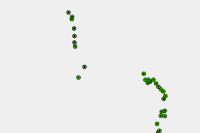

In [2]:
# Load data from arcGIS online
output = arcGIS_data_load('9bea1417c37946dfb2c662bd3d8a6d7f')

stations = output['data0']
observations = output['table0']
feature_service = output['feature_service']

In [3]:
stations.head()
observations.head()

,OBJECTID,Surveyor_1,Surveyor_2,Phenology,Observation_Date,Treat_Type,Treat_Notes,Herbicide,Contractor,Pct_Cover,GlobalID_2,Ref_to_Stations,Patch_Size_ft
0,1,Mizael Seminatore,None,Adult,2018-08-28 00:54:19,HandPulling,Plants growing near the pond.,None,Hanford,40.0,49657f5b-d64c-4623-a22c-0f5ba163ec09,b423c3aa-70cb-495f-92c7-fe1212502cc3,9687.5100
1,2,Mizael Seminatore,None,Adult,2018-08-28 23:51:19,Herbicide,Plants growing next to tributary.,Milestone,Hanford,5.0,bce63861-1986-4d34-a772-cbdb55d3d900,c04c5b09-ef7f-4187-9c7d-8bbed6ad9820,161.4585
2,3,Mizael Seminatore,None,Adult,2018-08-24 00:08:40,Herbicide,Plants growing nex to the tributary.,Milestone,Hanford,20.0,b50c166a-b840-4c43-bc19-cb820d7f5ab6,dd938c69-71c5-4293-89eb-143d810d12b5,484.3755
3,4,Mizael Seminatore,None,Adult,2018-08-24 00:14:14,Herbicide,Plants growing nex to the tributary.,Milestone,Hanford,10.0,3e751451-a5cd-4416-bb05-69542498741b,783f5cd9-82c3-4c30-ae34-3b4358b0db81,710.4174
4,5,Mizael Seminatore,None,Adult,2018-08-24 00:16:55,Herbicide,Plants growing nex to the tributary.,Milestone,Hanford,30.0,acfd11ae-8679-4037-91b5-310b26f2c525,7d6815fa-0ca9-4a2b-9b23-0d64d43ee5c2,32.2917


In [4]:
# Merge related table and feature layer
data = stations.merge(observations, left_on='GlobalID_2', right_on='Ref_to_Stations', how='inner')
data = data.drop(columns=['GlobalID_2_x','Ref_to_Stations'])
data = data.rename(columns={'OBJECTID_x':'Point_ID','GlobalID_2_y':'Record_GlobalID', 'OBJECTID_y':'Record_ID'})
data.head()

,Point_ID,BHR_Site,Plnt_Spc,Azimuth,SHAPE,Record_ID,Surveyor_1,Surveyor_2,Phenology,Observation_Date,Treat_Type,Treat_Notes,Herbicide,Contractor,Pct_Cover,Record_GlobalID,Patch_Size_ft
0,1,SAC,DIGR,90,"{'x': 6185395.54473357, 'y': 2035877.857551558...",1,Mizael Seminatore,None,Adult,2018-08-28 00:54:19,HandPulling,Plants growing near the pond.,None,Hanford,40.0,49657f5b-d64c-4623-a22c-0f5ba163ec09,9687.5100
1,1,SAC,DIGR,90,"{'x': 6185395.54473357, 'y': 2035877.857551558...",44,Mizael Seminatore,None,Adult,2019-08-22 00:54:00,HandPulling,Plants growing near the pond.,None,Hanford,5.0,7653fd97-c34c-4ba7-902f-766d7cf97e1f,6996.5350
2,1,SAC,DIGR,90,"{'x': 6185395.54473357, 'y': 2035877.857551558...",74,Kevin Sherrill,Other,Adult,2020-09-10 20:19:59,None,Not yet treated. Herbivory seen throughout tri...,None,Hanford,2.0,75ec5391-c488-46db-8174-fae845e450ff,6623.0000
3,1,SAC,DIGR,90,"{'x': 6185395.54473357, 'y': 2035877.857551558...",76,Kurt Lutz,Other,Vegetative,2021-09-16 16:44:41,Herbicide,"Treated twice with clear cast, most recently o...",Other,Hanford,2.0,1cd83a04-469c-4677-a7a7-c082540bf1ab,6623.0000
4,2,SAC,DIGR,230,"{'x': 6185980.41105465, 'y': 2035538.425187033...",2,Mizael Seminatore,None,Adult,2018-08-28 23:51:19,Herbicide,Plants growing next to tributary.,Milestone,Hanford,5.0,bce63861-1986-4d34-a772-cbdb55d3d900,161.4585


In [5]:
# Subset data for desired year.
sYear = input("Start Year? (YYYY)")
sub = year_subset(data,sYear)

Start Year? (YYYY) 

# QAQC

In [0]:
validate_domains(feature_service)

In [0]:
# QAQC Find blank entries
find_blank_entries(data, exclude_cols=['Date_Treated','Herbicide','Surveyor_2','Contractor','Vegetation_Cover_Notes','Treatment_Notes', 'Dominant_NNIP_Species', 'Codominant_NNIP_Species'])
#Blank Dominant NNIP(old), Codominant NNIP, BHR Site, Treatment. definition of codominant

In [0]:
# QAQC Look for blank dominant NNIP Species for baseline monitoring observation type only

#### Not relevant for this task ####

# subBASE = data.loc[data.Observation_Type=='Baseline',:]
# find_blank_entries(subBASE, exclude_cols=['Date_Treated','Herbicide','Surveyor_2','Contractor','Vegetation_Cover_Notes','Treatment_Notes', 'Codominant_NNIP_Species'])

In [0]:
QAQC_whitespace(sub, exclude_cols=['Comments', 'Vegetation_Cover_Notes','Treatment_Notes', 'Treat_Notes'],objectID = ['Record_ID'])

In [0]:
data.head()

In [0]:
# histogram and pie charts for select columns

QAQC_plot(data, ['Plnt_Spc','BHR_Site', 'Treat_Type', 'Contractor',
       'Pct_Cover', 'Herbicide', 'Observation_Date',
       'Phenology', 'Surveyor_1',
       'Surveyor_2', 'Patch_Size_ft'])


In [0]:
foo = find_outlier(sub, check_cols=['Patch_Size_ft'], boxplot=True)

In [0]:
compare_years_continuous(data, 'Patch_Size_ft', '2019','2020',50)

In [0]:
compare_years_catagorical(data, ['Plnt_Spc','BHR_Site', 'Treat_Type', 'Contractor',
       'Pct_Cover', 'Herbicide',
       'Phenology', 'Surveyor_1',
       'Surveyor_2', 'Patch_Size_ft'], '2019','2020')

In [0]:
plt.clf()
compare_surveyors(sub, 'Pct_Cover',obs_var='Surveyor_1', drop= 3)

Dropping surveyors with less than 5.0 observations
They did not make over 5% of total observation
Dropping Surveyors: []


/tmp/ipykernel_28811/2819515436.py:1: RankWarning: Polyfit may be poorly conditioned
  compare_surveyors(data, 'Pct_Cover',obs_var='Surveyor_1', drop= 5)


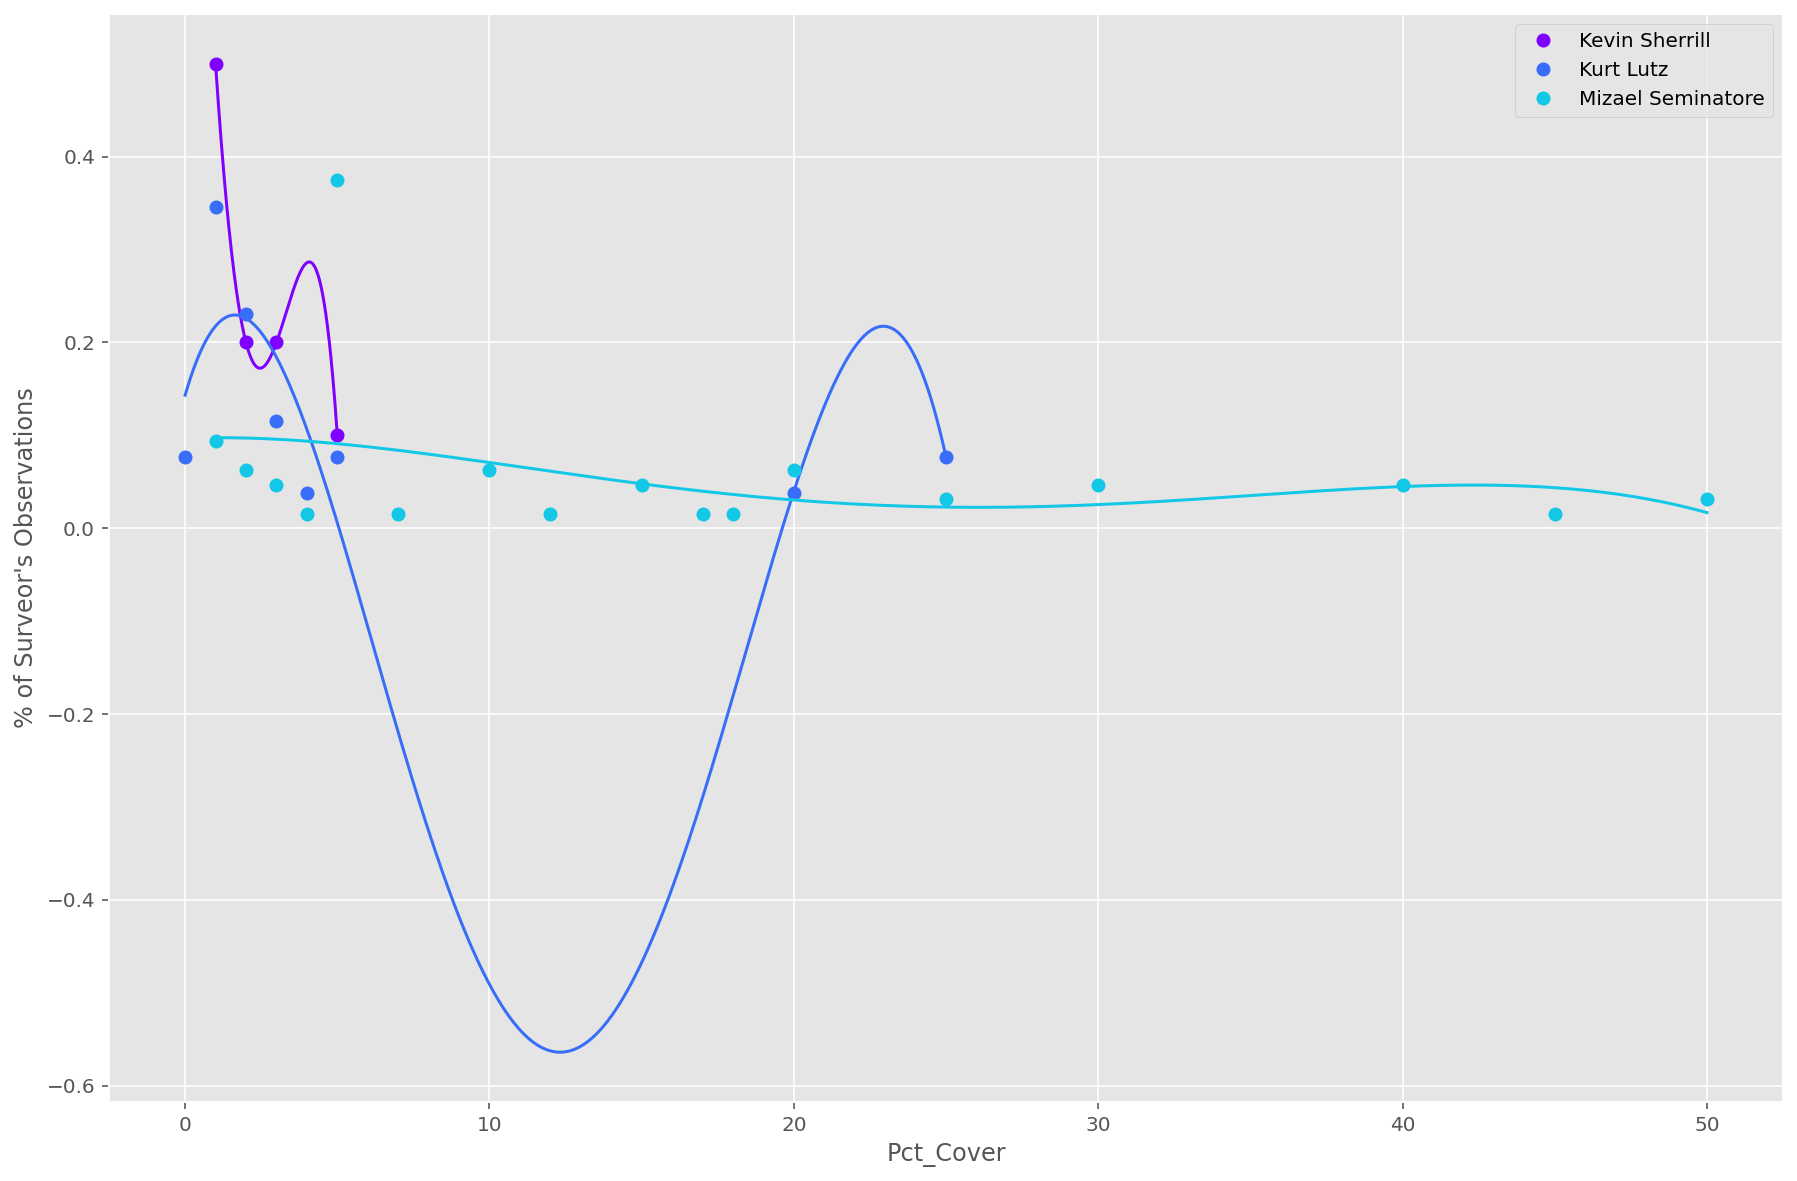

In [21]:
compare_surveyors(data, 'Pct_Cover',obs_var='Surveyor_1', drop= 5)

In [22]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Stations


Found mislabeled photo attachement(s):
Observations
Object ID: 1  Current Name:  attachment1.jpg
Object ID: 1  Current Name:  SAC_NNIPPhotoMonitoring_20180827_DIGR.jpg
Object ID: 2  Current Name:  attachment1.jpg
Object ID: 2  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg


Object ID: 3  Current Name:  attachment1.jpg
Object ID: 3  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 4  Current Name:  attachment1.jpg
Object ID: 4  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 5  Current Name:  attachment1.jpg
Object ID: 5  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 6  Current Name:  attachment1.jpg
Object ID: 6  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 7  Current Name:  attachment1.jpg
Object ID: 7  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 8  Current Name:  attachment1.jpg
Object ID: 8  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 9  Current Name:  attachment1.jpg
Object ID: 9  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 10  Current Name:  attachment1.jpg
Object ID: 10  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 11  Current Name:  attachment1.jpg
Object ID: 11  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 12  Current Name:  attachment1.jpg
Object ID: 12  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 13  Current Name:  attachment1.jpg
Object ID: 13  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 14  Current Name:  attachment1.jpg
Object ID: 14  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 15  Current Name:  attachment1.jpg
Object ID: 15  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 16  Current Name:  attachment1.jpg
Object ID: 16  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 17  Current Name:  attachment1.jpg
Object ID: 17  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 18  Current Name:  attachment1.jpg
Object ID: 18  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 19  Current Name:  attachment1.jpg
Object ID: 19  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 20  Current Name:  attachment1.jpg
Object ID: 20  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 21  Current Name:  attachment1.jpg
Object ID: 21  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 22  Current Name:  attachment1.jpg
Object ID: 22  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg
Object ID: 23  Current Name:  attachment1.jpg
Object ID: 23  Current Name:  SAC_NNIPPhotoMonitoring_20180823_DIGR.jpg


Object ID: 24  Current Name:  attachment1.jpg
Object ID: 24  Current Name:  SAC_NNIPPhotoMonitoring_20180827_DIGR.jpg
Object ID: 25  Current Name:  attachment1.jpg
Object ID: 25  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg


Object ID: 26  Current Name:  attachment1.jpg
Object ID: 26  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg
Object ID: 27  Current Name:  attachment1.jpg
Object ID: 27  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg


Object ID: 28  Current Name:  attachment1.jpg
Object ID: 28  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg
Object ID: 29  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg


Object ID: 30  Current Name:  attachment1.jpg
Object ID: 30  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg
Object ID: 31  Current Name:  attachment1.jpg
Object ID: 31  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg
Object ID: 

32  Current Name:  attachment1.jpg
Object ID: 32  Current Name:  SAC_NNIPPhotoMonitoring_20180828_DIGR.jpg
Object ID: 33  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 34  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg


Object ID: 35  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 36  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg


Object ID: 37  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 38  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 39  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg


Object ID: 40  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 41  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 42  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg


Object ID: 43  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 44  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg


Object ID: 45  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 46  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg


Object ID: 47  Current Name:  Photo1.jpg
Object ID: 47  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 48  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg


Object ID: 49  Current Name:  SAC_DIGRPhotoMonitoring_20190821.jpg
Object ID: 50  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg


Object ID: 51  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 52  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg


Object ID: 53  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 54  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 55  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg


Object ID: 56  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 57  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 58  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg


Object ID: 59  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 60  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 61  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg


Object ID: 62  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 63  Current Name:  attachment1.jpg
Object ID: 63  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg
Object ID: 64  Current Name:  SAC_NNIPPhotoMonitoring_20190821_DIGR.jpg


Object ID: 65  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg
Object ID: 66  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg


Object ID: 67  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg
Object ID: 68  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg
Object ID: 69  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg


Object ID: 70  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg
Object ID: 71  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg
Object ID: 72  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg


Object ID: 73  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg
Object ID: 74  Current Name:  SAC_NNIPPhotoMonitoring_20200910_DIGR.jpg


Object ID: 75  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_24.jpg
Object ID: 76  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_1.jpg
Object ID: 77  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_2.jpg


Object ID: 78  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_30.jpg
Object ID: 79  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_29.jpg
Object ID: 80  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_28.jpg


Object ID: 81  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_27.jpg
Object ID: 82  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_26.jpg


Object ID: 83  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_25.jpg
Object ID: 84  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_31.jpg
Object ID: 85  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_32.jpg


Object ID: 86  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_3.jpg
Object ID: 87  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_4.jpg


Object ID: 88  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_5.jpg
Object ID: 89  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_6.jpg


Object ID: 90  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_7.jpg
Object ID: 91  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_8.jpg
Object ID: 92  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_9.jpg


Object ID: 93  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_10.jpg
Object ID: 94  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_11.jpg


Object ID: 95  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_12.jpg
Object ID: 96  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_13.jpg
Object ID: 97  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_14.jpg


Object ID: 98  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_15.jpg
Object ID: 99  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_16.jpg


Object ID: 100  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_17.jpg
Object ID: 101  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_18.jpg


Object ID: 102  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_19.jpg
Object ID: 103  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_20.jpg


Object ID: 104  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_21.jpg
Object ID: 105  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_22.jpg
Object ID: 106  Current Name:  SAC_NNIPPhotoMonitoring_20210916_DIGR_23.jpg


# Export Data Deliverable

In [7]:
data.columns

Index(['Point_ID', 'BHR_Site', 'Plnt_Spc', 'Azimuth', 'SHAPE', 'Record_ID',
       'Surveyor_1', 'Surveyor_2', 'Phenology', 'Observation_Date',
       'Treat_Type', 'Treat_Notes', 'Herbicide', 'Contractor', 'Pct_Cover',
       'Record_GlobalID', 'Patch_Size_ft'],
      dtype='object')

In [33]:
data = data.rename(columns={'PointID':'Point ID','RecordID':'Record ID','RecordGlobalID':'Record Global ID'})

In [8]:
field_order = [
    'BHR_Site',
    'Observation_Date',
    'Surveyor_1',
    'Surveyor_2',
    'Plnt_Spc',
    'Phenology',
    'Pct_Cover',
    'Patch_Size_ft',
    'Azimuth',
    'Treat_Type',
    'Herbicide',
    'Contractor',
    'Treat_Notes',
    'Point_ID',
    'Record_ID',
    'Record_GlobalID',
    'SHAPE'
]

In [11]:
export_data_deliverable(data, feature_service, field_order, file_name='NNIP_Photo_Monitoring')

Exported to Outputs/NNIP_Photo_Monitoring_Data_20211026.xlsx
